# Details - Occlusion

in this notebook you will learn the intuition behind the features of the interpretability framework and how to us them.

## Layer Activation Mappings with AlexNet

Demonstration of visualizing layer attribution, the activation mapping  between two specified layers and their splits.

In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2  
%cd ../src

import data_utils
from data_utils import DataConfig
from midnite.common import Flatten
from plot_utils import *
from PIL import Image
from midnite import get_device
from midnite.visualization.base import *

import torch
from torch import Tensor
from torch.nn import Softmax
from torch.nn.modules import Sequential
from torch.nn.functional import interpolate
from torchvision import models

/home/fabian/Projects/midnite/src


## Step 1: Load pretrained model

In our example we use a pretrained ResNet for demonstration.

In [2]:
model = models.alexnet(pretrained=True)

model.eval()
model.to(get_device());

## Step 2: Load Image

In [3]:
input_ = data_utils.get_example_from_path("../data/imagenet_example_283.jpg", DataConfig.ALEX_NET)

In [4]:
# Pooling operations loose 10 pixels on each side
def upsample(img, target):
    return interpolate(
        img.unsqueeze(dim=0).unsqueeze(dim=0), 
        size=target.size()[2:],
        mode='bilinear',
        align_corners=True
    ).squeeze(0).squeeze(0)

## Example 4: Guided Backpropagation of the input image w.r.t. the class score

100%|██████████| 450/450 [00:42<00:00, 10.71it/s]


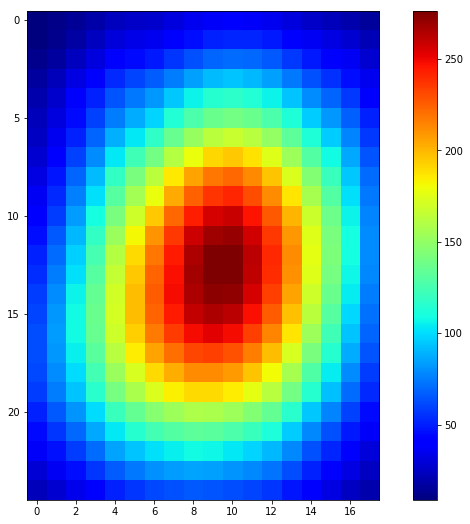

In [5]:
from midnite.visualization.base import Occlusion

heatmap = Occlusion(model, SplitSelector(NeuronSplit(), [283]), SpatialSplit(), chunk_size=(1, 10, 10), pixel_stride=(1, 20, 20)).visualize(input_)
show_heatmap(heatmap, 1.5)

100%|██████████| 450/450 [00:40<00:00, 11.51it/s]


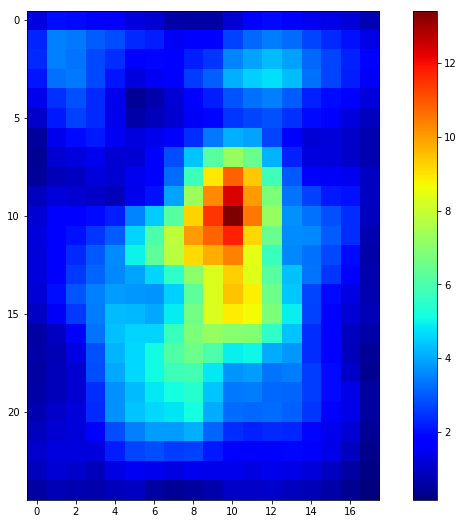

In [6]:
from midnite.visualization.base import Occlusion

heatmap = Occlusion(model, SplitSelector(NeuronSplit(), [283]), SpatialSplit(), chunk_size=(1, 3, 3), pixel_stride=(1, 20, 20)).visualize(input_)
show_heatmap(heatmap, 1.5)

In [ ]:
from midnite.visualization.base import Occlusion

print(input_.size())

heatmap = Occlusion(model, SplitSelector(NeuronSplit(), [283]), SpatialSplit(), chunk_size=(1, 20, 20), pixel_stride=(1, 5, 5)).visualize(input_)
show_heatmap(heatmap, 1.5, input_)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


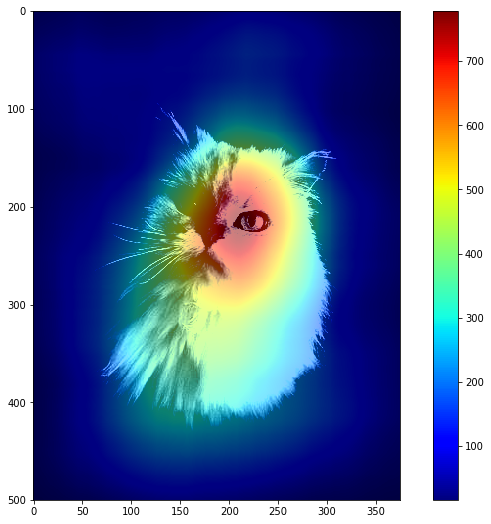

In [8]:
show_heatmap(upsample(heatmap, input_), 1.5, input_)

In [ ]:
import torch

x = torch.tensor([[[1, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0]]])

m0 = torch.tensor([[1, 0, 0],
                   [1, 1, 0],
                   [1, 1, 1]]) # 3 channels
m1 = torch.tensor([[1, 0],
                   [1, 1]]) # 2 height
m2 = torch.tensor([[1, 0, 0],
                   [1, 1, 0],
                   [0, 1, 1]]) # 2 width

x = (m0 @ x.transpose(1, 0)).transpose(1, 0)
print(x)
x = (m1 @ x.transpose(1, 1)).transpose(1, 1)
print(x)
x = (m2 @ x.transpose(1, 2)).transpose(1, 2)
print(x)